In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
df= pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\jones\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

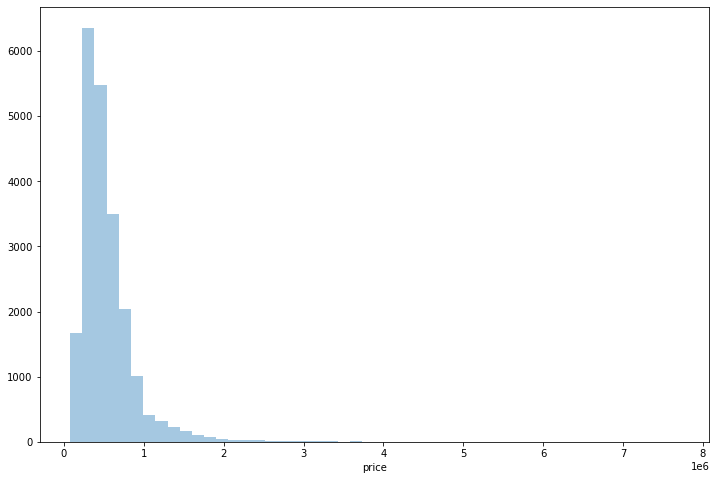

In [7]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'],kde=False,bins=50)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

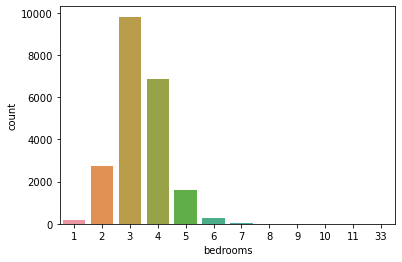

In [8]:
sns.countplot(x=df['bedrooms'])

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [10]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

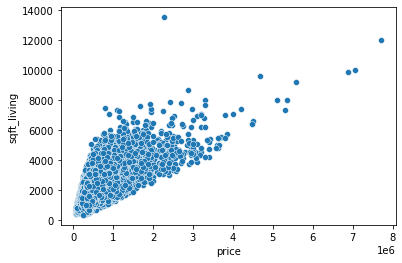

In [12]:
sns.scatterplot(data=df,x='price',y='sqft_living')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

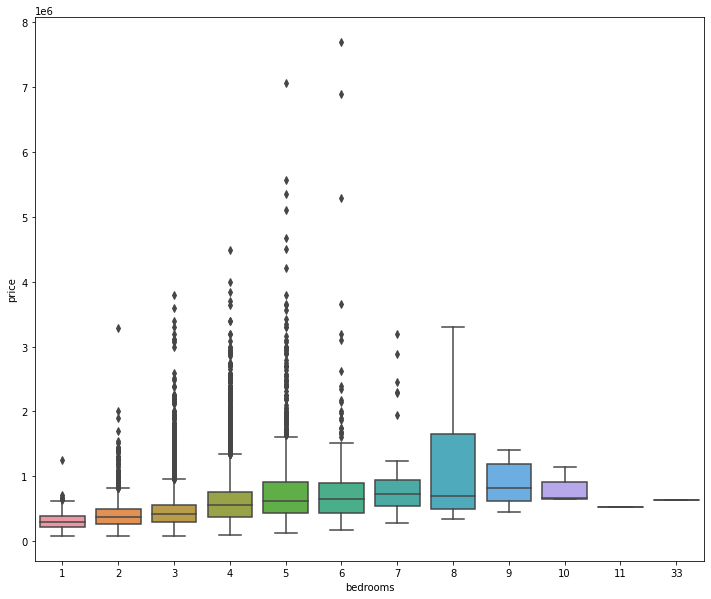

In [13]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df,x='bedrooms',y='price')

<AxesSubplot:xlabel='price', ylabel='long'>

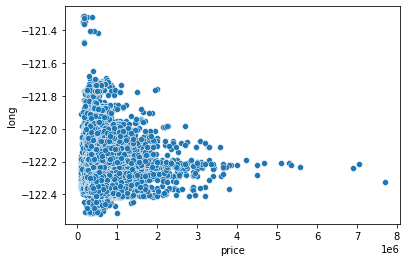

In [14]:
sns.scatterplot(data=df,x='price',y='long')

<AxesSubplot:xlabel='long', ylabel='lat'>

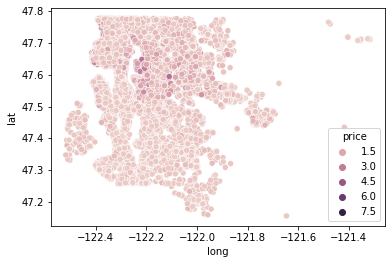

In [15]:
sns.scatterplot(data=df,x='long',y='lat',hue='price')

In [16]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [17]:
len(df)

21597

In [18]:
len(df)*0.01

215.97

In [19]:
non_top_1_percent=df.sort_values('price',ascending=False).iloc[216:]

In [20]:
non_top_1_percent

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='long', ylabel='lat'>

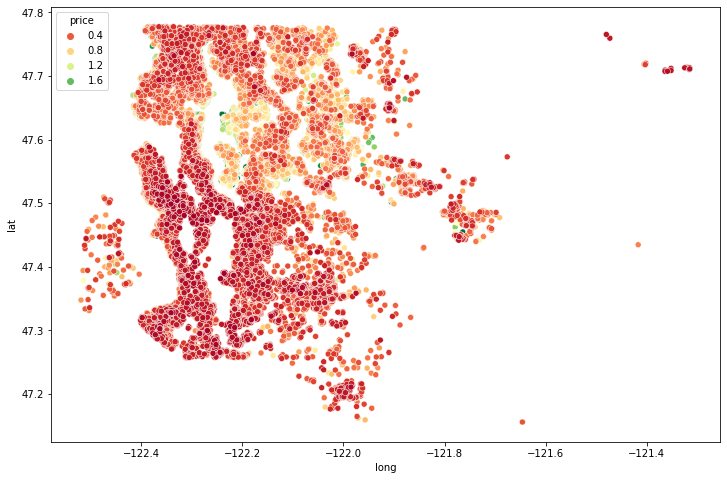

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=non_top_1_percent,x='long',y='lat',palette='RdYlGn',hue='price')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

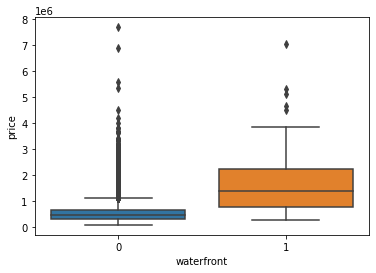

In [22]:
sns.boxplot(data=df,x='waterfront',y='price')

In [23]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
df.drop('id',axis=1,inplace=True)

In [25]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [26]:
df['date']=pd.to_datetime(df['date'])

In [27]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [28]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)

In [29]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

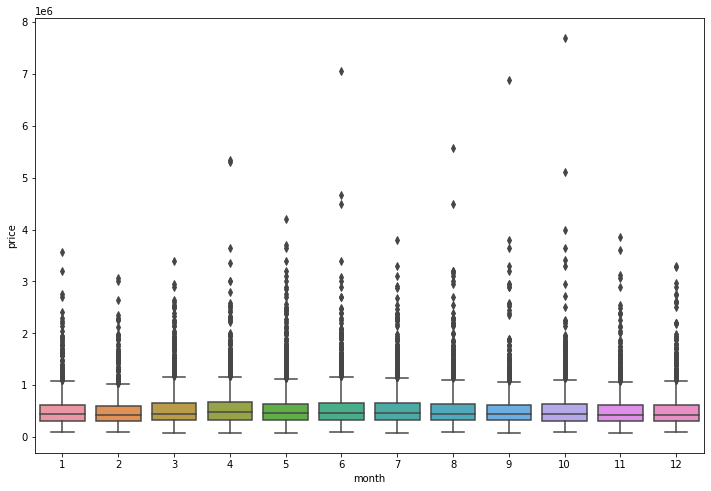

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='month',y='price')

In [31]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

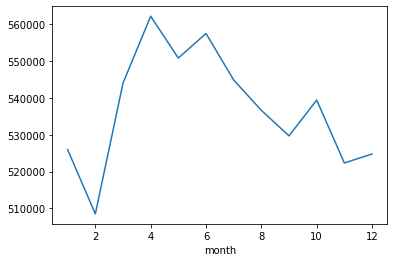

In [32]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

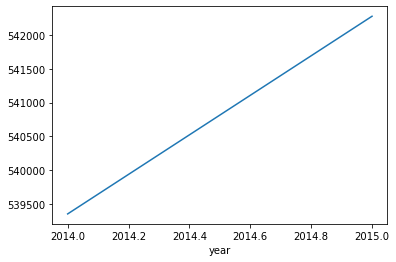

In [33]:
df.groupby('year').mean()['price'].plot()

In [34]:
df.drop('date',axis=1,inplace=True)

In [36]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [38]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [39]:
df=df.drop('zipcode',axis=1)

In [40]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [41]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [42]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [43]:
X=df.drop('price',axis=1).values
y=df['price'].values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler=MinMaxScaler()

In [48]:
X_train=scaler.fit_transform(X_train)

In [49]:
X_train.max()

1.0

In [50]:
X_test=scaler.transform(X_test)

In [52]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.        ,
        0.63636364],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.        ,
        0.81818182],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.        ,
        0.90909091],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 0.        ,
        1.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 1.        ,
        0.09090909],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.        ,
        0.45454545]])

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
X_train.shape

(15117, 19)

In [55]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [56]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 7ms/step - loss: 430234042368.0000 - val_loss: 418888155136.0000
Epoch 2/400
119/119 [==============================] - 1s 4ms/step - loss: 428957466624.0000 - val_loss: 414576705536.0000
Epoch 3/400
119/119 [==============================] - 1s 4ms/step - loss: 411826520064.0000 - val_loss: 375352164352.0000
Epoch 4/400
119/119 [==============================] - 1s 4ms/step - loss: 328388870144.0000 - val_loss: 241970872320.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 171764219904.0000 - val_loss: 108240953344.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 101553479680.0000 - val_loss: 94784208896.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 97080156160.0000 - val_loss: 93259448320.0000
Epoch 8/400
119/119 [==============================] - 1s 4ms/step - loss: 95398445056.0000 - val_loss: 91620286464.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 4ms/step - loss: 37375602688.0000 - val_loss: 36042051584.0000
Epoch 69/400
119/119 [==============================] - 0s 4ms/step - loss: 37169774592.0000 - val_loss: 35857719296.0000
Epoch 70/400
119/119 [==============================] - 0s 4ms/step - loss: 36988907520.0000 - val_loss: 35655528448.0000
Epoch 71/400
119/119 [==============================] - 0s 4ms/step - loss: 36828610560.0000 - val_loss: 35483897856.0000
Epoch 72/400
119/119 [==============================] - 0s 4ms/step - loss: 36699164672.0000 - val_loss: 35336769536.0000
Epoch 73/400
119/119 [==============================] - 0s 4ms/step - loss: 36521906176.0000 - val_loss: 35184521216.0000
Epoch 74/400
119/119 [==============================] - 0s 4ms/step - loss: 36406517760.0000 - val_loss: 35048431616.0000
Epoch 75/400
119/119 [==============================] - 0s 4ms/step - loss: 36267175936.0000 - val_loss: 34926522368.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 4ms/step - loss: 32560578560.0000 - val_loss: 30971680768.0000
Epoch 136/400
119/119 [==============================] - 0s 4ms/step - loss: 32495185920.0000 - val_loss: 30931365888.0000
Epoch 137/400
119/119 [==============================] - 0s 4ms/step - loss: 32495196160.0000 - val_loss: 30895595520.0000
Epoch 138/400
119/119 [==============================] - 0s 4ms/step - loss: 32456294400.0000 - val_loss: 30876979200.0000
Epoch 139/400
119/119 [==============================] - 0s 4ms/step - loss: 32438683648.0000 - val_loss: 30858702848.0000
Epoch 140/400
119/119 [==============================] - 0s 4ms/step - loss: 32401164288.0000 - val_loss: 30780510208.0000
Epoch 141/400
119/119 [==============================] - 0s 4ms/step - loss: 32346454016.0000 - val_loss: 30738077696.0000
Epoch 142/400
119/119 [==============================] - 0s 4ms/step - loss: 32351090688.0000 - val_loss: 30714585088.0000
Epoch 143/400
11

119/119 [==============================] - 0s 4ms/step - loss: 31165427712.0000 - val_loss: 29361059840.0000
Epoch 202/400
119/119 [==============================] - 0s 4ms/step - loss: 31147622400.0000 - val_loss: 29441110016.0000
Epoch 203/400
119/119 [==============================] - 0s 4ms/step - loss: 31123736576.0000 - val_loss: 29327964160.0000
Epoch 204/400
119/119 [==============================] - 0s 4ms/step - loss: 31141570560.0000 - val_loss: 29360984064.0000
Epoch 205/400
119/119 [==============================] - 0s 4ms/step - loss: 31084365824.0000 - val_loss: 29411489792.0000
Epoch 206/400
119/119 [==============================] - 0s 4ms/step - loss: 31098472448.0000 - val_loss: 29298890752.0000
Epoch 207/400
119/119 [==============================] - 0s 4ms/step - loss: 31060092928.0000 - val_loss: 29336567808.0000
Epoch 208/400
119/119 [==============================] - 1s 4ms/step - loss: 31132854272.0000 - val_loss: 29223757824.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 30209159168.0000 - val_loss: 28290347008.0000
Epoch 268/400
119/119 [==============================] - 0s 4ms/step - loss: 30212775936.0000 - val_loss: 28247136256.0000
Epoch 269/400
119/119 [==============================] - 0s 4ms/step - loss: 30184626176.0000 - val_loss: 28238063616.0000
Epoch 270/400
119/119 [==============================] - 0s 4ms/step - loss: 30183462912.0000 - val_loss: 28346118144.0000
Epoch 271/400
119/119 [==============================] - 1s 5ms/step - loss: 30147872768.0000 - val_loss: 28299194368.0000
Epoch 272/400
119/119 [==============================] - 1s 5ms/step - loss: 30249050112.0000 - val_loss: 28413136896.0000
Epoch 273/400
119/119 [==============================] - 1s 4ms/step - loss: 30141349888.0000 - val_loss: 28202708992.0000
Epoch 274/400
119/119 [==============================] - 1s 5ms/step - loss: 30116593664.0000 - val_loss: 28123858944.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 29100345344.0000 - val_loss: 27009404928.0000
Epoch 334/400
119/119 [==============================] - 0s 4ms/step - loss: 29080203264.0000 - val_loss: 26984429568.0000
Epoch 335/400
119/119 [==============================] - 1s 5ms/step - loss: 29098229760.0000 - val_loss: 26988740608.0000
Epoch 336/400
119/119 [==============================] - 1s 5ms/step - loss: 29111582720.0000 - val_loss: 26934278144.0000
Epoch 337/400
119/119 [==============================] - 1s 4ms/step - loss: 29077745664.0000 - val_loss: 26968971264.0000
Epoch 338/400
119/119 [==============================] - 1s 4ms/step - loss: 29064312832.0000 - val_loss: 26914693120.0000
Epoch 339/400
119/119 [==============================] - 1s 4ms/step - loss: 29044357120.0000 - val_loss: 26916552704.0000
Epoch 340/400
119/119 [==============================] - 1s 5ms/step - loss: 29052966912.0000 - val_loss: 26919981056.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 1s 6ms/step - loss: 28236249088.0000 - val_loss: 25933604864.0000
Epoch 400/400
119/119 [==============================] - 1s 5ms/step - loss: 28196562944.0000 - val_loss: 25943173120.0000


In [57]:
losses=pd.DataFrame(model.history.history)

In [58]:
losses.head()

,loss,val_loss
0,4.302340e+11,4.188882e+11
1,4.289575e+11,4.145767e+11
2,4.118265e+11,3.753522e+11
3,3.283889e+11,2.419709e+11
4,1.717642e+11,1.082410e+11


<AxesSubplot:xlabel='loss', ylabel='val_loss'>

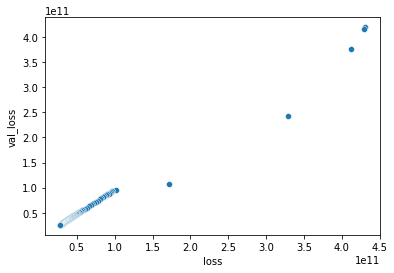

In [59]:
sns.scatterplot(data=losses,x='loss',y='val_loss')

<AxesSubplot:>

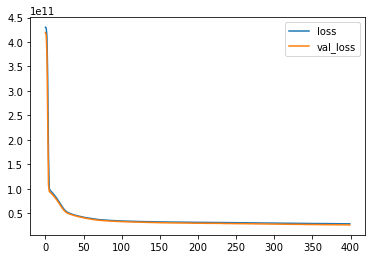

In [60]:
losses.plot()

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [62]:
prediction=model.predict(X_test)

203/203 [==============================] - 1s 2ms/step


In [63]:
prediction

array([[437813.5 ],
       [584503.56],
       [576027.56],
       ...,
       [388621.78],
       [604117.9 ],
       [678600.7 ]], dtype=float32)

In [64]:
mean_absolute_error(y_test,prediction)

99449.44920428241

In [65]:
mean_squared_error(y_test,prediction)

25943173593.521175

In [66]:
np.sqrt(mean_squared_error(y_test,prediction))

161068.84737130633

In [67]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [68]:
5.402966e+05

540296.6

In [69]:
explained_variance_score(y_test,prediction)

0.8044581449914086

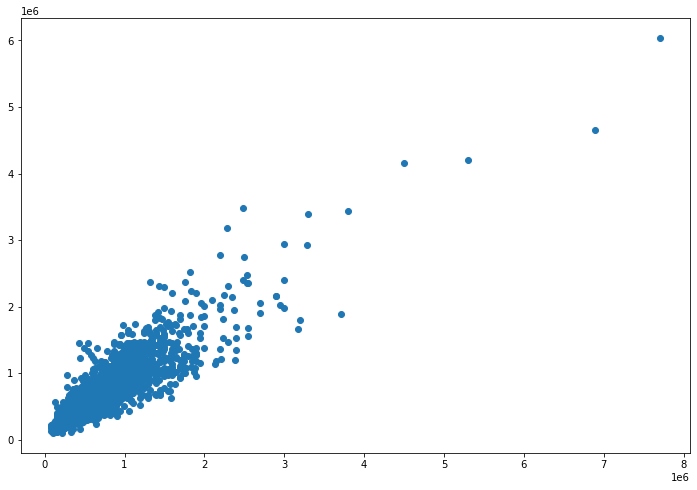

In [70]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,prediction)

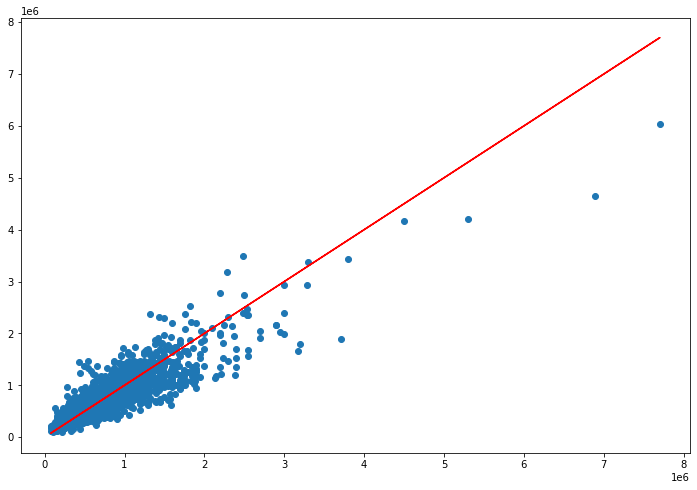

In [71]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,prediction)
plt.plot(y_test,y_test,'r')

In [72]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [73]:
single_house=df.drop('price',axis=1).iloc[0]

In [75]:
single_house=scaler.transform(single_house.values.reshape(-1,19))

In [76]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [77]:
model.predict(single_house)

1/1 [==============================] - 0s 63ms/step


array([[272577.84]], dtype=float32)

In [80]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
